In [81]:
from pymongo.collection import Collection
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
from pymongo import errors as mongoerrors
import os
from dotenv import load_dotenv
# Carregando as variáveis de ambiente do arquivo .env
load_dotenv()
import requests
import json
from datetime import datetime, date
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# URI Mongo DB Atlas
uri_mongo = f"mongodb+srv://{os.getenv('DB_USER')}:{os.getenv('DB_PWD')}@{os.getenv('DB_CLUSTER')}/?retryWrites=true&w=majority&appName=Cluster0"

In [3]:
# Realiza a conexão com o MongoDB e retorna a coleção informada.
def conectar(uri:str, database:str, collection:str)->tuple[Collection, MongoClient]:
    try:
        client = MongoClient(uri, server_api=ServerApi('1'))
        client.admin.command('ping')

        databases = client.list_database_names()
    
        if database in databases:  # Verifica se o Database já existe. Caso contrário o cria.
            db = client[database]
            colecao = db[collection]
            colecoes = db.list_collection_names()

            if collection in colecoes: # Verifica se a Coleção já exsite. Caso contrário a cria.
                return colecao, client
    except mongoerrors.ConnectionFailure as e:
        client = None
        print(e)
    except mongoerrors.PyMongoError as e:
        print(e)

### Consultas as coleções no Database.

* Realizaremos algumas consultas utilizando os recursos da biblioteca `Pymongo` como:
    *  Métodos para recuperação de dados de uma coleção: `find()` e `find_one()`.
    *  Operadores de consulta de comparação.
    *  Operadores de consulta lógica.
    *  Lidar com objetos Python `datetime` para filtrar coleções.

In [24]:
# Retorna todas a cotações entre Dolar -> Real para um Dataframe Pandas.
try:
    collection, client = conectar(uri=uri_mongo, database=os.getenv('DB_NAME'), collection=os.getenv('DB_COLLECTION'))
    results = collection.find({"moeda_de" : "USD"})
    data = pd.DataFrame(list(results))
    display(data)
except mongoerrors.PyMongoError as e:
    print(f"Erro ao realizar a consulta na base de dados: {e}")
except Exception as e:
    print(f"Ocorreu um erro: {e}")
finally:
    client.close()

,_id,moeda_de,moeda_para,conversao,valor_maximo,valor_minimo,variacao,porcentagem_variacao,valor_compra,valor_venda,data_negociacao
0,67c7b9a1c1f2bd4c02d62a55,USD,BRL,Dólar Americano/Real Brasileiro,5.90528,5.90528,-0.020320,-0.344100,5.88467,5.88526,2025-03-04 23:14:56
1,67c7b9a1c1f2bd4c02d62a56,USD,BRL,Dólar Americano/Real Brasileiro,5.88520,5.86414,0.000000,0.000000,5.88520,5.88720,2025-03-02 20:54:03
2,67c7b9a1c1f2bd4c02d62a57,USD,BRL,Dólar Americano/Real Brasileiro,5.90347,5.82410,0.063000,1.078750,5.90310,5.90440,2025-03-01 20:42:03
3,67c7b9a1c1f2bd4c02d62a58,USD,BRL,Dólar Americano/Real Brasileiro,5.90310,5.82410,0.063000,1.078750,5.90310,5.90440,2025-02-28 18:58:22
4,67c7b9a1c1f2bd4c02d62a59,USD,BRL,Dólar Americano/Real Brasileiro,5.84449,5.82460,0.000500,0.008560,5.84060,5.84220,2025-02-27 20:58:15
5,67c7b9a1c1f2bd4c02d62a5a,USD,BRL,Dólar Americano/Real Brasileiro,5.80669,5.79000,-0.001300,-0.022400,5.80220,5.80520,2025-02-26 20:59:24
6,67c7b9a1c1f2bd4c02d62a5b,USD,BRL,Dólar Americano/Real Brasileiro,5.74830,5.73607,0.000290,0.005050,5.73989,5.74240,2025-02-25 20:59:12
7,67c7b9a1c1f2bd4c02d62a5c,USD,BRL,Dólar Americano/Real Brasileiro,5.78260,5.70780,0.049200,0.858710,5.77870,5.78140,2025-02-24 20:59:39
8,67c7b9a1c1f2bd4c02d62a5d,USD,BRL,Dólar Americano/Real Brasileiro,5.73260,5.71317,-0.002500,-0.043615,5.72950,5.73080,2025-02-23 19:00:02
9,67c7b9a1c1f2bd4c02d62a5e,USD,BRL,Dólar Americano/Real Brasileiro,5.73550,5.69530,0.029100,0.510270,5.73200,5.73400,2025-02-22 00:49:18


In [25]:
# Retorna o total de documentos na coleção - Total de documentos cotação USD - BRL - Total de documentos cotação EUR - BRL
try:
    collection, client = conectar(uri=uri_mongo, database=os.getenv('DB_NAME'), collection=os.getenv('DB_COLLECTION'))
    docs = collection.count_documents({})
    usd_docs = collection.count_documents({"moeda_de" : "USD"})
    eur_docs = collection.count_documents({"moeda_de" : "EUR"})

    print(f"Nossa coleção possui um total de {docs} documentos, sendo {usd_docs} de cotações entre USD/BRL e {eur_docs} de cotações entre EUR/BRL")
except mongoerrors.PyMongoError as e:
    print(f"Erro ao realizar a consulta na base de dados: {e}")
except Exception as e:
    print(f"Ocorreu um erro: {e}")
finally:
    client.close()

Nossa coleção possui um total de 58 documentos, sendo 29 de cotações entre USD/BRL e 29 de cotações entre EUR/BRL


In [26]:
# Retorna os documentos de cotações entre USD -> BRL cujo valor máximo de cotação seja menor que o especificado.
try:
    collection, client = conectar(uri=uri_mongo, database=os.getenv('DB_NAME'), collection=os.getenv('DB_COLLECTION'))
    results = collection.find({"$and": [{"moeda_de" : "USD"}, {"valor_maximo" : {"$lt" : 5.8}}]})
    data = pd.DataFrame(list(results))
    display(data)
except mongoerrors.PyMongoError as e:
    print(f"Erro ao realizar a consulta na base de dados: {e}")
except Exception as e:
    print(f"Ocorreu um erro: {e}")
finally:
    client.close()

,_id,moeda_de,moeda_para,conversao,valor_maximo,valor_minimo,variacao,porcentagem_variacao,valor_compra,valor_venda,data_negociacao
0,67c7b9a1c1f2bd4c02d62a5b,USD,BRL,Dólar Americano/Real Brasileiro,5.7483,5.73607,0.000290,0.005050,5.73989,5.74240,2025-02-25 20:59:12
1,67c7b9a1c1f2bd4c02d62a5c,USD,BRL,Dólar Americano/Real Brasileiro,5.7826,5.70780,0.049200,0.858710,5.77870,5.78140,2025-02-24 20:59:39
2,67c7b9a1c1f2bd4c02d62a5d,USD,BRL,Dólar Americano/Real Brasileiro,5.7326,5.71317,-0.002500,-0.043615,5.72950,5.73080,2025-02-23 19:00:02
3,67c7b9a1c1f2bd4c02d62a5e,USD,BRL,Dólar Americano/Real Brasileiro,5.7355,5.69530,0.029100,0.510270,5.73200,5.73400,2025-02-22 00:49:18
4,67c7b9a1c1f2bd4c02d62a5f,USD,BRL,Dólar Americano/Real Brasileiro,5.7355,5.69530,0.026600,0.466430,5.72950,5.73080,2025-02-21 19:10:02
5,67c7b9a1c1f2bd4c02d62a60,USD,BRL,Dólar Americano/Real Brasileiro,5.7214,5.68790,-0.016996,-0.297070,5.69757,5.71124,2025-02-20 20:59:39
6,67c7b9a1c1f2bd4c02d62a61,USD,BRL,Dólar Americano/Real Brasileiro,5.7324,5.68420,0.032662,0.574110,5.72060,5.72360,2025-02-19 20:58:35
7,67c7b9a1c1f2bd4c02d62a62,USD,BRL,Dólar Americano/Real Brasileiro,5.7247,5.67690,-0.022900,-0.400840,5.68820,5.69120,2025-02-18 20:59:04
8,67c7b9a1c1f2bd4c02d62a63,USD,BRL,Dólar Americano/Real Brasileiro,5.7135,5.71170,0.000500,0.010000,5.71300,5.71400,2025-02-17 19:00:03
9,67c7b9a1c1f2bd4c02d62a64,USD,BRL,Dólar Americano/Real Brasileiro,5.7707,5.69280,-0.062700,-1.040000,5.69500,5.69700,2025-02-14 17:58:59


In [27]:
# Retorna os documentos de cotações entre USD -> BRL cuja data de negociação é maior ou igual a data especificada.
try:
    collection, client = conectar(uri=uri_mongo, database=os.getenv('DB_NAME'), collection=os.getenv('DB_COLLECTION'))
    results = collection.find({"data_negociacao" : {"$gte" : datetime(2025,2,25,23,59,59)}})
    data = pd.DataFrame(list(results))
    display(data)
except mongoerrors.PyMongoError as e:
    print(f"Erro ao realizar a consulta na base de dados: {e}")
except Exception as e:
    print(f"Ocorreu um erro: {e}")
finally:
    client.close()

,_id,moeda_de,moeda_para,conversao,valor_maximo,valor_minimo,variacao,porcentagem_variacao,valor_compra,valor_venda,data_negociacao
0,67c7b9a1c1f2bd4c02d62a55,USD,BRL,Dólar Americano/Real Brasileiro,5.90528,5.90528,-0.020320,-0.34410,5.88467,5.88526,2025-03-04 23:14:56
1,67c7b9a1c1f2bd4c02d62a56,USD,BRL,Dólar Americano/Real Brasileiro,5.88520,5.86414,0.000000,0.00000,5.88520,5.88720,2025-03-02 20:54:03
2,67c7b9a1c1f2bd4c02d62a57,USD,BRL,Dólar Americano/Real Brasileiro,5.90347,5.82410,0.063000,1.07875,5.90310,5.90440,2025-03-01 20:42:03
3,67c7b9a1c1f2bd4c02d62a58,USD,BRL,Dólar Americano/Real Brasileiro,5.90310,5.82410,0.063000,1.07875,5.90310,5.90440,2025-02-28 18:58:22
4,67c7b9a1c1f2bd4c02d62a59,USD,BRL,Dólar Americano/Real Brasileiro,5.84449,5.82460,0.000500,0.00856,5.84060,5.84220,2025-02-27 20:58:15
5,67c7b9a1c1f2bd4c02d62a5a,USD,BRL,Dólar Americano/Real Brasileiro,5.80669,5.79000,-0.001300,-0.02240,5.80220,5.80520,2025-02-26 20:59:24
6,67c7ba7e7ede744995e2cff5,EUR,BRL,Euro/Real Brasileiro,6.29020,6.24732,0.011132,0.17780,6.26793,6.27169,2025-03-04 22:51:49
7,67c7ba7e7ede744995e2cff6,EUR,BRL,Euro/Real Brasileiro,6.27655,6.21774,0.067271,1.08160,6.26026,6.28658,2025-03-04 20:59:52
8,67c7ba7e7ede744995e2cff7,EUR,BRL,Euro/Real Brasileiro,6.32112,6.16960,-0.124000,-1.97098,6.16730,6.46452,2025-03-03 20:59:15
9,67c7ba7e7ede744995e2cff8,EUR,BRL,Euro/Real Brasileiro,6.14210,6.10727,-0.002500,-0.04082,6.12150,6.12400,2025-03-02 20:54:05


In [28]:
# Retorna os documentos de cotações entre USD -> BRL cuja data de negociação esta entre a data inicial e final especificada.
try:
    collection, client = conectar(uri=uri_mongo, database=os.getenv('DB_NAME'), collection=os.getenv('DB_COLLECTION'))
    results = collection.find({"$and" : [{"data_negociacao" : {"$gte" : datetime(2025,2,25,23,59,59)}}
                                         , {"data_negociacao" : {"$lte" : datetime(2025,2,28,23,59,59)}}]}).sort("data_negociacao")
    data = pd.DataFrame(list(results))
    display(data)
except mongoerrors.PyMongoError as e:
    print(f"Erro ao realizar a consulta na base de dados: {e}")
except Exception as e:
    print(f"Ocorreu um erro: {e}")
finally:
    client.close()

,_id,moeda_de,moeda_para,conversao,valor_maximo,valor_minimo,variacao,porcentagem_variacao,valor_compra,valor_venda,data_negociacao
0,67c7ba7e7ede744995e2cffb,EUR,BRL,Euro/Real Brasileiro,6.09014,6.07808,-0.00297,-0.04880,6.08273,6.09756,2025-02-26 20:59:19
1,67c7b9a1c1f2bd4c02d62a5a,USD,BRL,Dólar Americano/Real Brasileiro,5.80669,5.79000,-0.00130,-0.02240,5.80220,5.80520,2025-02-26 20:59:24
2,67c7b9a1c1f2bd4c02d62a59,USD,BRL,Dólar Americano/Real Brasileiro,5.84449,5.82460,0.00050,0.00856,5.84060,5.84220,2025-02-27 20:58:15
3,67c7ba7e7ede744995e2cffa,EUR,BRL,Euro/Real Brasileiro,6.07534,6.05570,0.01090,0.18000,6.06660,6.07460,2025-02-27 20:58:34
4,67c7b9a1c1f2bd4c02d62a58,USD,BRL,Dólar Americano/Real Brasileiro,5.90310,5.82410,0.06300,1.07875,5.90310,5.90440,2025-02-28 18:58:22
5,67c7ba7e7ede744995e2cff9,EUR,BRL,Euro/Real Brasileiro,6.13260,6.05570,0.06880,1.13612,6.12450,6.12700,2025-02-28 19:32:09


In [29]:
# Retorna os documentos de cotações entre USD -> BRL cuja data de negociação esta entre a data inicial e final especificada.
try:
    collection, client = conectar(uri=uri_mongo, database=os.getenv('DB_NAME'), collection=os.getenv('DB_COLLECTION'))
    results = collection.find({"moeda_de" : "USD"})
    data_dolar = pd.DataFrame(list(results))
    display(data_dolar)
except mongoerrors.PyMongoError as e:
    print(f"Erro ao realizar a consulta na base de dados: {e}")
except Exception as e:
    print(f"Ocorreu um erro: {e}")
finally:
    client.close()

,_id,moeda_de,moeda_para,conversao,valor_maximo,valor_minimo,variacao,porcentagem_variacao,valor_compra,valor_venda,data_negociacao
0,67c7b9a1c1f2bd4c02d62a55,USD,BRL,Dólar Americano/Real Brasileiro,5.90528,5.90528,-0.020320,-0.344100,5.88467,5.88526,2025-03-04 23:14:56
1,67c7b9a1c1f2bd4c02d62a56,USD,BRL,Dólar Americano/Real Brasileiro,5.88520,5.86414,0.000000,0.000000,5.88520,5.88720,2025-03-02 20:54:03
2,67c7b9a1c1f2bd4c02d62a57,USD,BRL,Dólar Americano/Real Brasileiro,5.90347,5.82410,0.063000,1.078750,5.90310,5.90440,2025-03-01 20:42:03
3,67c7b9a1c1f2bd4c02d62a58,USD,BRL,Dólar Americano/Real Brasileiro,5.90310,5.82410,0.063000,1.078750,5.90310,5.90440,2025-02-28 18:58:22
4,67c7b9a1c1f2bd4c02d62a59,USD,BRL,Dólar Americano/Real Brasileiro,5.84449,5.82460,0.000500,0.008560,5.84060,5.84220,2025-02-27 20:58:15
5,67c7b9a1c1f2bd4c02d62a5a,USD,BRL,Dólar Americano/Real Brasileiro,5.80669,5.79000,-0.001300,-0.022400,5.80220,5.80520,2025-02-26 20:59:24
6,67c7b9a1c1f2bd4c02d62a5b,USD,BRL,Dólar Americano/Real Brasileiro,5.74830,5.73607,0.000290,0.005050,5.73989,5.74240,2025-02-25 20:59:12
7,67c7b9a1c1f2bd4c02d62a5c,USD,BRL,Dólar Americano/Real Brasileiro,5.78260,5.70780,0.049200,0.858710,5.77870,5.78140,2025-02-24 20:59:39
8,67c7b9a1c1f2bd4c02d62a5d,USD,BRL,Dólar Americano/Real Brasileiro,5.73260,5.71317,-0.002500,-0.043615,5.72950,5.73080,2025-02-23 19:00:02
9,67c7b9a1c1f2bd4c02d62a5e,USD,BRL,Dólar Americano/Real Brasileiro,5.73550,5.69530,0.029100,0.510270,5.73200,5.73400,2025-02-22 00:49:18


### Análise Exploratória de Dados

In [30]:
data_dolar.head(5)

,_id,moeda_de,moeda_para,conversao,valor_maximo,valor_minimo,variacao,porcentagem_variacao,valor_compra,valor_venda,data_negociacao
0,67c7b9a1c1f2bd4c02d62a55,USD,BRL,Dólar Americano/Real Brasileiro,5.90528,5.90528,-0.02032,-0.34410,5.88467,5.88526,2025-03-04 23:14:56
1,67c7b9a1c1f2bd4c02d62a56,USD,BRL,Dólar Americano/Real Brasileiro,5.88520,5.86414,0.00000,0.00000,5.88520,5.88720,2025-03-02 20:54:03
2,67c7b9a1c1f2bd4c02d62a57,USD,BRL,Dólar Americano/Real Brasileiro,5.90347,5.82410,0.06300,1.07875,5.90310,5.90440,2025-03-01 20:42:03
3,67c7b9a1c1f2bd4c02d62a58,USD,BRL,Dólar Americano/Real Brasileiro,5.90310,5.82410,0.06300,1.07875,5.90310,5.90440,2025-02-28 18:58:22
4,67c7b9a1c1f2bd4c02d62a59,USD,BRL,Dólar Americano/Real Brasileiro,5.84449,5.82460,0.00050,0.00856,5.84060,5.84220,2025-02-27 20:58:15


In [31]:
# Resumo estatístico da nossa coleção.
data_dolar.describe()

,valor_maximo,valor_minimo,variacao,porcentagem_variacao,valor_compra,valor_venda,data_negociacao
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29
mean,5.795808,5.760095,0.005315,0.091814,5.781422,5.783421,2025-02-16 23:05:30.827586048
min,5.713500,5.676900,-0.062700,-1.080000,5.688200,5.691200,2025-01-31 17:58:56
25%,5.748300,5.707800,-0.001300,-0.022400,5.729500,5.730800,2025-02-07 17:58:59
50%,5.782600,5.758000,0.000500,0.010000,5.766900,5.767700,2025-02-17 19:00:03
75%,5.824600,5.805500,0.026600,0.466430,5.807000,5.810000,2025-02-24 20:59:39
max,5.933200,5.905280,0.063000,1.078750,5.903100,5.904400,2025-03-04 23:14:56
std,0.062403,0.060742,0.030518,0.520652,0.063757,0.063109,NaN


##### Vamos realizar algumas análises baseadas na variável `valor_maximo`, que representa o maior valor da cotação obtido naquele dia.

In [48]:
# Coeficiente de variação
cv = np.std(data_dolar['valor_maximo'])/np.mean(data_dolar['valor_maximo']) * 100
print(f'O coeficiente de variação foi de: {cv:.2f}%')

O coeficiente de variação foi de: 1.06%


In [59]:
# Alcance => Diferença entre .max() .min().
alcance = data_dolar['valor_maximo'].max() - data_dolar['valor_maximo'].min()
print(f"O valor do alcance é de: {alcance:.2f}")

O valor do alcance é de: 0.22


Através de nosso resumo, podemos citar algumas características da variável `valor_maximo`:
* Durante o período avaliado, cuja extração abrange entre `31-01-2025` a `04-03-2025`, houve pequena variação nos valores, como podemos avaliar a seguir: 
    * Coeficiente de variação de apenas 1.06%.
    * Valor do alcance (diferença entre o valor máximo(5.9332) - mínimo(5.7135)) é de 0.22.
    * 75% dos dados estão entre os valores de 5.7135 e 5.8246.

Vamos plotar alguns gráficos para melhor visualizarmos essas conclusões.    

[]

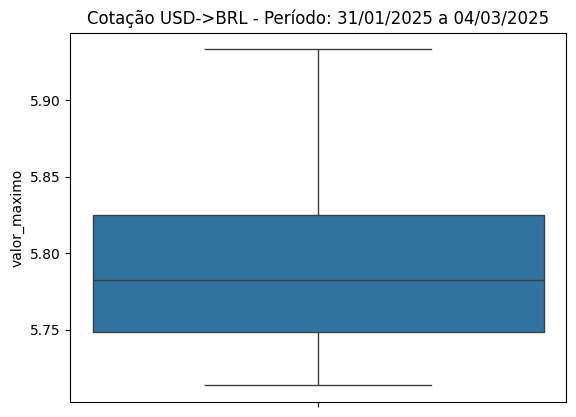

In [67]:
# Boxplot
title="Cotação USD->BRL - Período: 31/01/2025 a 04/03/2025"
df = data_dolar
ax = sns.boxplot(df, y="valor_maximo")
ax.set_title(title)
ax.plot()

[]

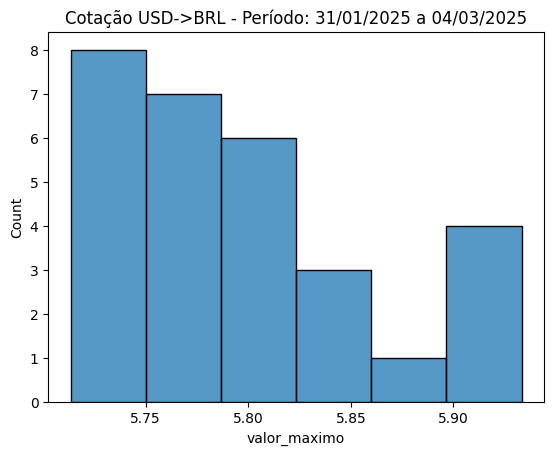

In [68]:
# Histograma
title="Cotação USD->BRL - Período: 31/01/2025 a 04/03/2025"
df = data_dolar
ax = sns.histplot(df, x="valor_maximo")
ax.set_title(title)
ax.plot()

[]

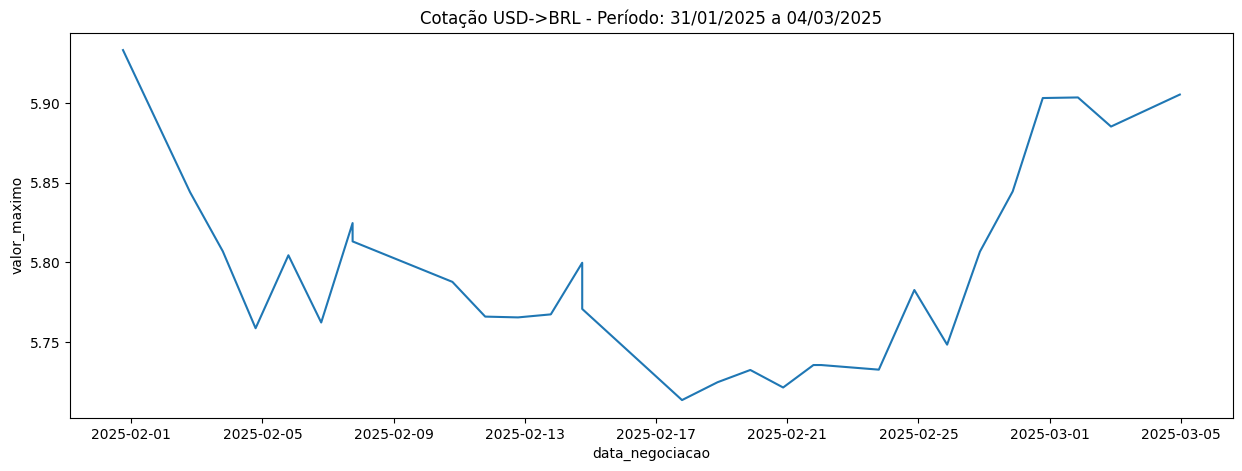

In [79]:
# Linha
title="Cotação USD->BRL - Período: 31/01/2025 a 04/03/2025"
df = data_dolar
plt.figure(figsize=(15,5))
ax = sns.lineplot(df, x="data_negociacao", y="valor_maximo")
ax.set_title(title)
ax.plot()


In [ ]:
# Estrutura de dados da coleção no MongoDB.
# {
#     "moeda_de" : str,
#     "moeda_para" : str,
#     "conversao" : str,
#     "valor_maximo" : float,
#     "valor_minimo" : float,
#     "variacao" : float,
#     "porcentagem_variacao" : float,
#     "valor_compra" : float,
#     "valor_venda" : float,
#     "data_negociacao" : datetime
# }